# Vibrações com excitação harmônica e Movimento relativo - 1 Grau de Liberdade
 _Prof. Tito Dias Júnior_


Algumas vezes, a base ou suporte de um sistema de amortecimento de massa-mola sofre movimento harmônico,
como mostrado na fig.(a). Seja $y(t)$ o deslocamento da base e $x(t)$ o deslocamento
da massa a partir de sua posição de equilíbrio estático no tempo $t$. Então, o alongamento líquido do
a mola é $x - y$ e a velocidade relativa entre as duas extremidades do amortecedor é $\dot{x} - \dot{y}$. Do diagrama de corpo livre
mostrado na fig.(b), obtemos a equação do movimento

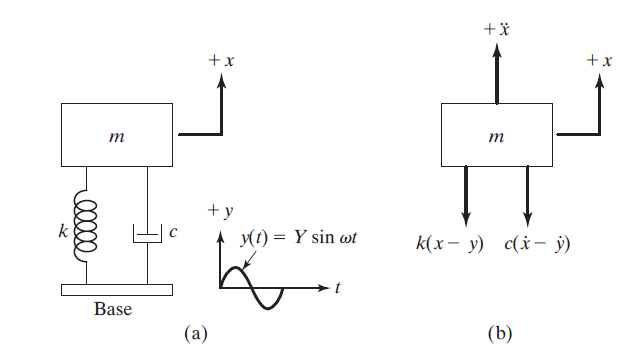


A equação governante é:

$m\ddot{x} + c (\dot{x}-\dot{y}) +k(x-y) = 0$

Se $y(t) = Y sen(\omega t)$, então 

$m\ddot{x} + c \dot{x} + kx = ky + c\dot{y} = kY sen(\omega t)+c \omega Y cos(\omega t)$, e ainda, podemos escrever

$m\ddot{x} + c \dot{x} + kx = A sen(\omega t- \alpha)$

Onde $A = Y \sqrt{k^2+ (c\omega)^2}$  e $\alpha =  tg^{-1} [-c\omega/k]$

A resposta da massa em regime permanente pode, após manipulações algébricas, ser escrita como:

$x(t) = X sen(\omega t-\phi)$, onde $X$ e $\phi$ são escritos

$$
\frac{X}{Y} = \left[ \frac{k^2+(c \omega)^2}{(k-m\omega^2)^2+(c \omega)^2} \right]^{1/2} = \left[ \frac{1+(2 \zeta r)^2}{(1-r^2)^2+(2 \zeta r)^2} \right]^{1/2}
$$

e
$$
\phi = tg^{-1} \left[ \frac{2 \zeta r^3}{1+(4 \zeta^2-1)r^2} \right]
$$

A razão entre a amplitude da massa e da base $X/Y$ é denominada transmissibilidade de deslocamento. E $ r = \omega/\omega_n$




## Exemplo - Veículo se movendo em uma via acidentada

A Figura abaixo mostra um modelo simples de um veículo motorizado que pode vibrar na direção vertical enquanto viajando por uma estrada acidentada. O veículo tem uma massa de 1200 kg. O sistema de suspensão tem uma mola com constante de $400 kN / m$ e uma razão de amortecimento de $\zeta = 0,5$. Se a velocidade do veículo for de $20 km / h$, determine a amplitude de deslocamento do veículo. A superfície da estrada varia sinusoidalmente com uma amplitude de $Y = 0,05m$ e comprimento de onda de 6 m.

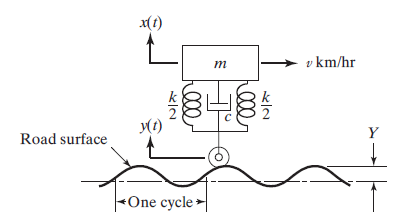

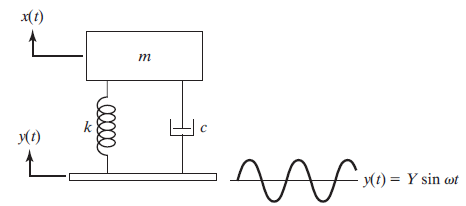

### **Solução**

A frequência de excitação $\omega$ da base pode ser encontrada dividindo a velocidade do veículo ($km/h$) pelo comprimento de onde de um ciclo :

$ v= \frac{\Delta S}{T}$, mas a $f=\frac{1}{T}$, substituindo na fórmula anterior, obtemos

$ v = f \times \Delta S$, e isolando a frequência, $f = v/ \Delta S$

$$
\omega = 2 \pi f  = 2 \pi \left(\frac{v \times 1000}{3600} \right) \frac{1}{6} = 0,290889 v \, rad/s
$$


e para $ v = 20 km/h$, obetmos $\omega = 5,81778 rad/s$. A frequência natural do veículo é dada por

$$
\omega_n = \sqrt{\frac{k}{m}} = \left( \frac{400 \times 10^3}{1200} \right)^{1/2} = 18,2574 \, rad/s
$$

e então a razão de frequência $r$ é

$$
r = \frac{\omega}{\omega_n}= \frac{5,81778}{18,2574}=0,318653
$$

A razão de amplitudes pode ser finalmente calculada:

$$
\frac{X}{Y} =  \left[ \frac{1+(2 \zeta r)^2}{(1-r^2)^2+(2 \zeta r)^2} \right]^{1/2} =  \left[ \frac{1+(2 \times 0,5 \times 0,318653)^2}{(1-(0,318653^2)^2+(2 \times 0,5 \times 0,318653)^2} \right]^{1/2} = 1,100964
$$

Assim, a amplitude de deslocamento do veículo é dado por

$$
X = 1,100964Y = 1,100964 \times 0,05 = 0,055048 \, m
$$

O que indica que uma ondulação de $5cm$ é transmitida como um solavanco de $5,5cm$ para o chassi e para os passageiros do veículo. Nesse caso, os passageiros sentem o movimento amplificado.

## Como diminuir esse efeito?

Para o programa, vamos precisar do módulo  _scipy_ para a integração e o _pylab_ para plotar os resultados.

Inicialmente, vamos definir, como uma função, o sistema de equações que será chamado posteriormente:

In [3]:
def sistema(w, t, p):
    import numpy as nps
    """
    Define o sistema de equações diferenciais para o sistema.

    Argumentos:
        w :  vetor das variáveis de estado
                  w = [x,y]
        t :  tempo
        p :  vetor de parâmetros conhecidos
                  p = [m,k,c]
    """
    x, y = w
    m, k, c, Y, omega = p
    F0 = Y * nps.sqrt( k**2 + (c*omega)**2 )
    # Cria a função f = (x',y'):
    f = [y,
         (-c * y - k * x + F0*nps.sin(omega*t) ) / m]
    return f

Agora podemos escrever a parte do programa para efetuar a integração do sistema de EDO:

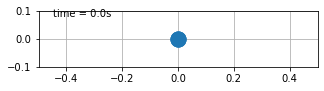

aqui


In [35]:
import numpy as np       # Importa o módulo numpy (métodos numéricos)
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.animation as animation
from matplotlib.patches import Circle

# variáveis dos enunciado

## Parâmetros da suspensão
m = 1200.               # Massa
k = 400000.             # Coeficiente de mola
zeta = 0.5              # razão de amortecimento viscoso

w_n = np.sqrt(k/m)      # Frequência natural
c_critico = 2*m*w_n     # Coeficiente de amortecimento crítico

c = zeta * c_critico    # Coeficiente de amortecimento
L = 6.0                 # Comprimento de onda 
v = 20.0                # Velocidade do veículo (km/h) 

## Parâmetros de excitação da base
Y = 0.05                                     # Amplitude da força de excitação
omega = 2*np.pi*v*1000 / (L*3600)            # Frequência de excitação
r = omega/w_n                                # Razão de frequências

x0 = 0.0             # Condição inicial para x0
y0 = 0.0             # Condição inicial para y0

# Parâmetros e critérios de parada do algoritmo de integração ODE
abserr = 1.0e-8        # Erro absoluto
relerr = 1.0e-6        # Erro relativo
stoptime = 10.0        # Tempo final de integração
numpoints = 501       # Número de pontos de integração

# Cria o vetor com os valores dos tempos de integração para utiliza no plot
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]
dt = t[1]-t[0]

# Agrupando os parâmetros e condições iniciais par ao algoritmo:
p = [m, k, c, Y, omega]
w0 = [x0, y0]

# Chamada ao algoritmo de integração 
wsol = odeint(sistema, w0, t, args=(p,),atol=abserr, rtol=relerr)

# Separa a solução nos vetores x e y
x = wsol[:,0]
y = wsol[:,1]


F0 = Y * np.sqrt( k**2 + (c*omega)**2 )

x1 = x
wt = [omega*stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]
y1 = Y*np.sin(wt)



fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.5,0.5), ylim=(-2*Y, 2*Y))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2, markersize=15)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)




def animate(i):
    thisx = [0, 0, 0]
    thisy = [0,  x1[i], y1[i]]

    line.set_data(thisx, thisy)
    center = (x1[i], y1[i])
   # cir  = plt.Circle(center, 0.1, color='black')
    
    time_text.set_text(time_template % (i*dt))
    return  line, time_text


ani = animation.FuncAnimation(
    fig, animate, len(wsol), interval=dt*numpoints, blit=True)
plt.show()

ani.save('final2.mp4')
print('aqui')

from IPython.display import HTML
HTML(ani.to_html5_video())



In [ ]:
print('Frequência Natural = ', w_n)
print('Frequência da Base (Hz) = ', omega/(2*np.pi))
print('Amplitude de x(t) = ', np.min(x))
print('Razão de frequências r = ', r)









# Plotando o resultado
plt.figure()         # Define uma figura para plotar
                     # Figura é formada por dois subplots

plt.subplot(211)     # Primeira forma de solução
plt.plot(t,x, label="x(t)")
#plt.plot(t,y, label="x'(t)")
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('x(t), y(t)')

plt.subplot(212)     # Segunda forma de solução
plt.plot(x,y)
plt.xlabel('x(t) [m]')
plt.ylabel('y(t) [m/s]')

plt.show()

## Referências

Kiusalaas, J. (2013). **Numerical Methods in Engineering With Python 3**. Cambridge: Cambridge.<br>
S. Rao. (2012) **Vibrações Mecânicas**. Prentice Hall, 4.ª ed. 